In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

Now we import the processed data

In [5]:
path = r"C:\Users\guill\OneDrive\Documents\Vishrut\PhD applications\Projects\(ML) Laptop Price Prediction\edited_dataframe.csv"

df = pd.read_csv(path)
df.head()

Company   TypeName  Inches  Ram  OpSys  Weight   Price  ScreenBreadth  \
0   Apple  Ultrabook    13.3    8  macOS     1.4   71378           2560   
1   Apple  Ultrabook    13.3    8  macOS     1.3   47895           1440   
2      HP   Notebook    15.6    8  No OS     1.9   30636           1920   
3   Apple  Ultrabook    15.4   16  macOS     1.8  135195           2880   
4   Apple  Ultrabook    13.3    8  macOS     1.4   96095           2560   

   ScreenLength Screen Panel Type Additional Screen Features CPU Brand  \
0          1600         IPS Panel             Retina Display     Intel   
1           900          Standard                   Standard     Intel   
2          1080          Standard                    Full HD     Intel   
3          1800         IPS Panel             Retina Display     Intel   
4          1600         IPS Panel             Retina Display     Intel   

  CPU Series  CPU Clock Speed  Memory Size  Additional Memory Memory Type  \
0       Core              2.3          128                  0         SSD   
1       Core              1.8          128                  0       Flash   
2       Core              2.5          256                  0         SSD   
3       Core              2.7          512                  0         SSD   
4       Core              3.1          256                  0         SSD   

  GPU Brand GPU Series  
0     Intel       Iris  
1     Intel         HD  
2     Intel         HD  
3       AMD     Radeon  
4     Intel       Iris

In [6]:
df.describe()

Inches          Ram       Weight          Price  ScreenBreadth  \
count  1271.000000  1272.000000  1272.000000    1272.000000    1272.000000   
mean     15.130448     8.456761     2.076336   59952.966195    1894.199686   
std       1.955161     5.562577     0.807507   37346.837366     494.389426   
min      10.100000     1.000000     0.000000    9270.000000    1366.000000   
25%      14.000000     4.000000     1.500000   31914.000000    1600.000000   
50%      15.600000     8.000000     2.000000   52107.500000    1920.000000   
75%      15.600000     8.000000     2.300000   79346.500000    1920.000000   
max      35.600000    64.000000    11.100000  324954.000000    3840.000000   

       ScreenLength  CPU Clock Speed  Memory Size  Additional Memory  
count   1272.000000      1272.000000  1272.000000        1272.000000  
mean    1070.531447         2.298601   448.261006         173.264151  
std      284.512222         0.507193   366.613019         413.745616  
min      768.000000         0.900000     8.000000           0.000000  
25%      900.000000         2.000000   256.000000           0.000000  
50%     1080.000000         2.500000   256.000000           0.000000  
75%     1080.000000         2.700000   512.000000           0.000000  
max     2160.000000         3.600000  2048.000000        2048.000000

Now, one by one, we one-hot encode the readily encodable features.

In [7]:
df = df.join(pd.get_dummies(df.Company))
df = df.drop("Company", axis = 1)

In [8]:
df = df.join(pd.get_dummies(df.TypeName))
df = df.drop("TypeName", axis = 1)

In [9]:
df = df.join(pd.get_dummies(df.TypeName))
df = df.drop("TypeName", axis = 1)

AttributeError: 'DataFrame' object has no attribute 'TypeName'

Now we need to be careful while one-hot encoding the CPU Brand (as well as GPU Brand), but in certain instances they might share the same company. This would needlessly result in two identical columns, which might potentially confuse the machine learning model.

In [10]:
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns] # Add _CPU to make sure it is a CPU feature

In [11]:

df = df.join(cpu_categories)
df = df.drop(columns="CPU Brand")

In [12]:
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns] # Add _GPU to make sure it is a GPU feature

In [13]:

df = df.join(gpu_categories)
df = df.drop(columns="GPU Brand")

In [14]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis = 1)

In [15]:
df = df.join(pd.get_dummies(df["Screen Panel Type"]))
df = df.drop("Screen Panel Type", axis = 1)

In [16]:
df = df.join(pd.get_dummies(df["Additional Screen Features"], prefix="ScreenFeature"))
df = df.drop("Additional Screen Features", axis=1)

In [17]:
gpu_series_categories = pd.get_dummies(df["GPU Series"])
gpu_series_categories.columns = [col + "_GPU" for col in gpu_series_categories.columns]

df = df.join(gpu_series_categories)
df = df.drop(columns="GPU Series")

In [18]:
cpu_series_categories = pd.get_dummies(df["CPU Series"])
cpu_series_categories.columns = [col + "_CPU" for col in cpu_series_categories.columns]

df = df.join(cpu_series_categories)
df = df.drop(columns="CPU Series")

In [19]:
df = df.join(pd.get_dummies(df["Memory Type"]))
df = df.drop("Memory Type", axis=1)

In [20]:
df.columns

Index(['Inches', 'Ram', 'Weight', 'Price', 'ScreenBreadth', 'ScreenLength',
       'CPU Clock Speed', 'Memory Size', 'Additional Memory', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'AMD_CPU', 'Intel_CPU', 'Samsung_CPU',
       'AMD_GPU', 'ARM_GPU', 'Intel_GPU', 'Nvidia_GPU', 'Android', 'Chrome OS',
       'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7',
       'macOS', 'IPS Panel', 'Standard', 'Touchscreen',
       'ScreenFeature_4K Ultra HD', 'ScreenFeature_Full HD',
       'ScreenFeature_Quad HD+', 'ScreenFeature_Retina Display',
       'ScreenFeature_Standard', 'FirePro_GPU', 'GTX_GPU', 'GeForce_GPU',
       'Graphics_GPU', 'HD_GPU', 'Iris_GPU', 'Mali_GPU', 'Quadro_GPU',
       'R17M-M1-70_GPU', 'R4_GPU', 'Radeon_GPU', 

<Axes: >

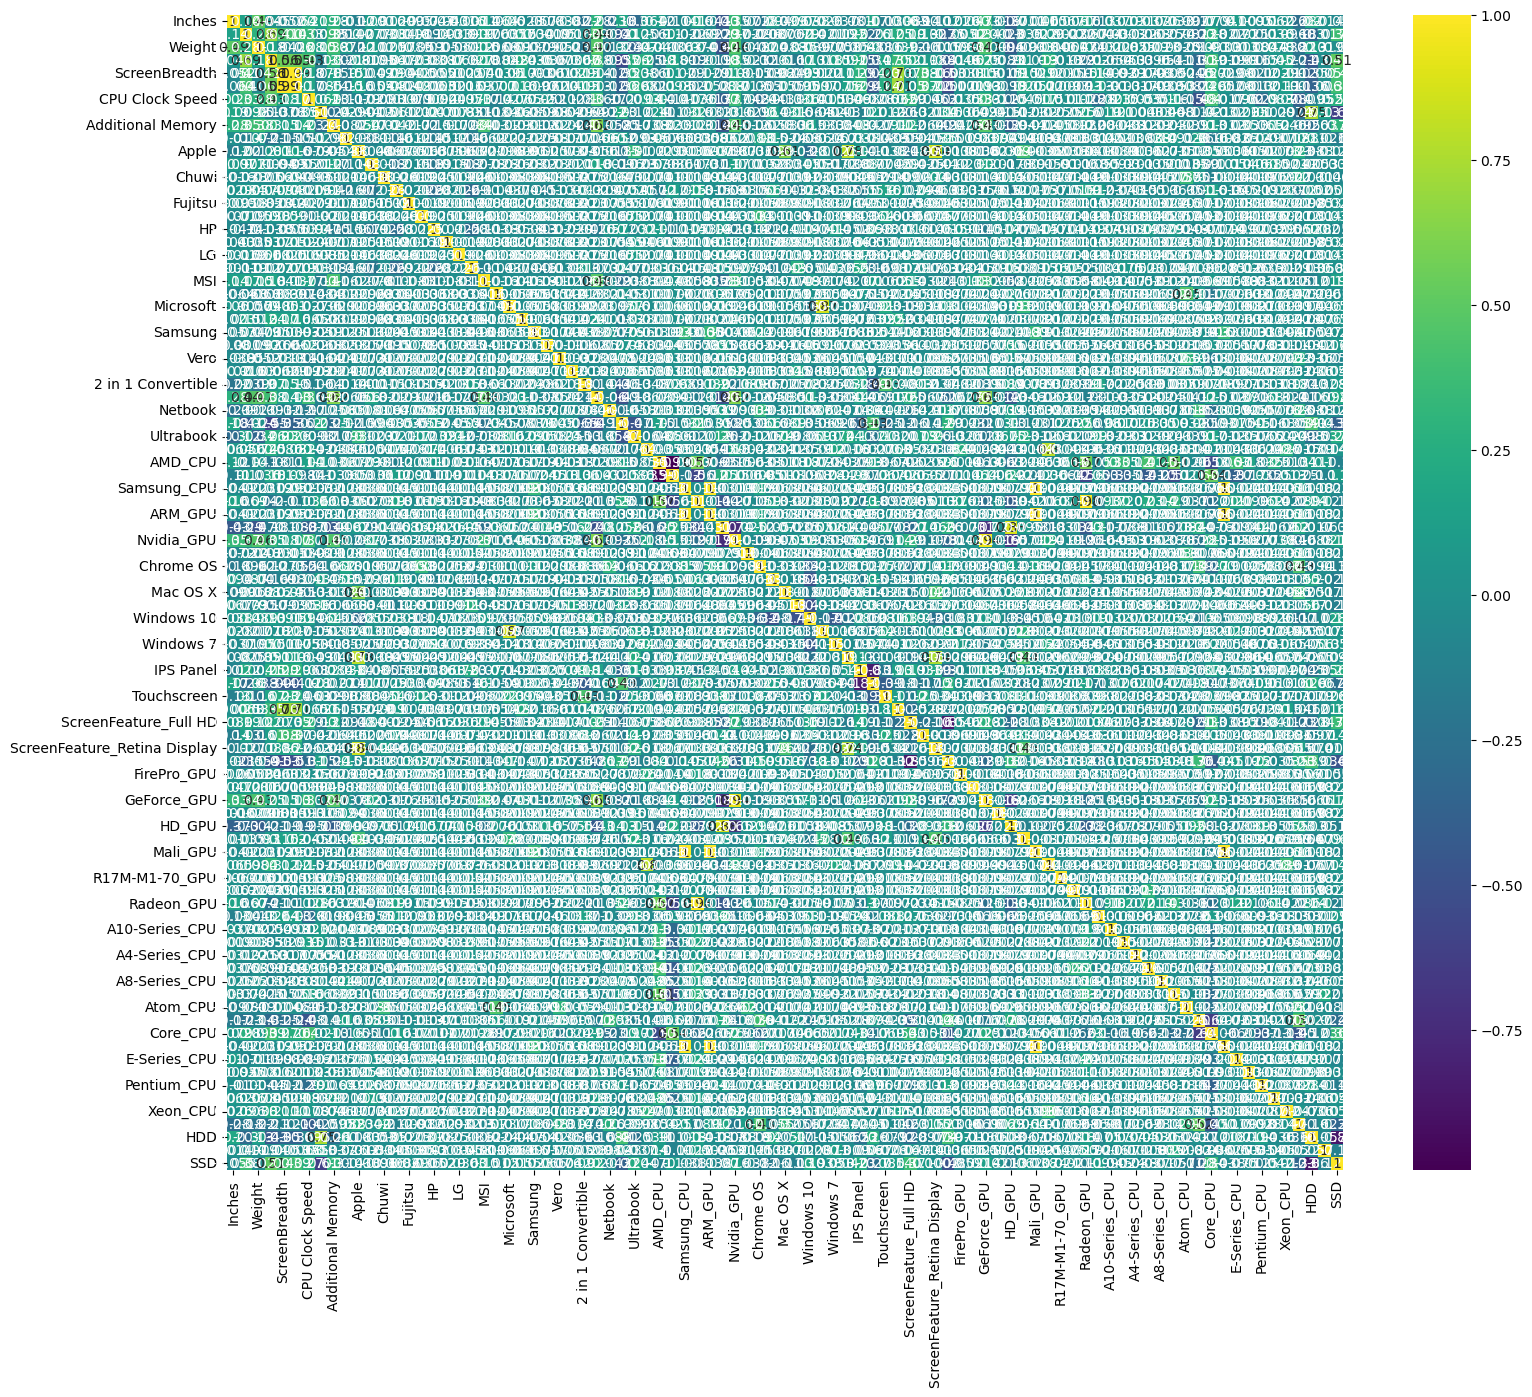

In [21]:
import seaborn as sns

plt.figure(figsize = (18,15))
sns.heatmap(df.corr(), annot=True, cmap = 'viridis')

We obviously have too many features, many of which might not be contribute very much to predicting the price of a laptop. Now we reduce the size of the dataframe by only considering features which pass a certain threshold of correlation with price. We select the value of the threshold to be 0.15 

In [22]:
main_correlations = df.corr()["Price"].apply(abs).sort_values()

In [23]:
main_correlations[-39:] # We select only the last 39 (including price) features.

Pentium_CPU                  0.152985
Windows 7                    0.153439
Linux                        0.162525
No OS                        0.171581
Touchscreen                  0.173454
Weight                       0.176325
MSI                          0.177956
Intel_GPU                    0.182158
AMD_CPU                      0.182405
Intel_CPU                    0.183437
Xeon_CPU                     0.197090
AMD_GPU                      0.199139
ScreenFeature_Full HD        0.199704
Radeon_GPU                   0.207641
Flash                        0.207837
Acer                         0.211173
HD_GPU                       0.213407
Razer                        0.235782
GeForce_GPU                  0.247178
Workstation                  0.251806
IPS Panel                    0.254930
Ultrabook                    0.258661
Additional Memory            0.296800
Quadro_GPU                   0.300739
Celeron_CPU                  0.311388
Standard                     0.336692
ScreenFeatur

In [24]:
selected_features = main_correlations[-39:].index

In [25]:
selected_features = list(selected_features)
selected_features

['Pentium_CPU',
 'Windows 7',
 'Linux',
 'No OS',
 'Touchscreen',
 'Weight',
 'MSI',
 'Intel_GPU',
 'AMD_CPU',
 'Intel_CPU',
 'Xeon_CPU',
 'AMD_GPU',
 'ScreenFeature_Full HD',
 'Radeon_GPU',
 'Flash',
 'Acer',
 'HD_GPU',
 'Razer',
 'GeForce_GPU',
 'Workstation',
 'IPS Panel',
 'Ultrabook',
 'Additional Memory',
 'Quadro_GPU',
 'Celeron_CPU',
 'Standard',
 'ScreenFeature_4K Ultra HD',
 'Nvidia_GPU',
 'Gaming',
 'Core_CPU',
 'ScreenFeature_Standard',
 'HDD',
 'CPU Clock Speed',
 'SSD',
 'ScreenLength',
 'Notebook',
 'ScreenBreadth',
 'Ram',
 'Price']

In [26]:
selected_df = df[selected_features]
selected_df

Pentium_CPU  Windows 7  Linux  No OS  Touchscreen  Weight    MSI  \
0           False      False  False  False        False     1.4  False   
1           False      False  False  False        False     1.3  False   
2           False      False  False   True        False     1.9  False   
3           False      False  False  False        False     1.8  False   
4           False      False  False  False        False     1.4  False   
...           ...        ...    ...    ...          ...     ...    ...   
1267        False      False  False  False        False     1.8  False   
1268        False      False  False  False        False     1.3  False   
1269        False      False  False  False        False     1.5  False   
1270        False      False  False  False        False     2.2  False   
1271        False      False  False  False        False     2.2  False   

      Intel_GPU  AMD_CPU  Intel_CPU  ...  Core_CPU  ScreenFeature_Standard  \
0          True    False       True  ...      True                   False   
1          True    False       True  ...      True                    True   
2          True    False       True  ...      True                   False   
3         False    False       True  ...      True                   False   
4          True    False       True  ...      True                   False   
...         ...      ...        ...  ...       ...                     ...   
1267       True    False       True  ...      True                   False   
1268       True    False       True  ...      True                   False   
1269       True    False       True  ...     False                    True   
1270      False    False       True  ...      True                    True   
1271       True    False       True  ...     False                    True   

        HDD  CPU Clock Speed    SSD  ScreenLength  Notebook  ScreenBreadth  \
0     False              2.3   True          1600     False           2560   
1     False              1.8  False           900     False           1440   
2     False              2.5   True          1080      True           1920   
3     False              2.7   True          1800     False           2880   
4     False              3.1   True          1600     False           2560   
...     ...              ...    ...           ...       ...            ...   
1267  False              2.5   True          1080     False           1920   
1268  False              2.5   True          1800     False           3200   
1269  False              1.6  False           768      True           1366   
1270   True              2.5  False           768      True           1366   
1271   True              1.6  False           768      True           1366   

      Ram   Price  
0       8   71378  
1       8   47895  
2       8   30636  
3      16  135195  
4       8   96095  
...   ...     ...  
1267    4   33992  
1268   16   79866  
1269    2   12201  
1270    6   40705  
1271    4   19660  

[1272 rows x 39 columns]

<Axes: >

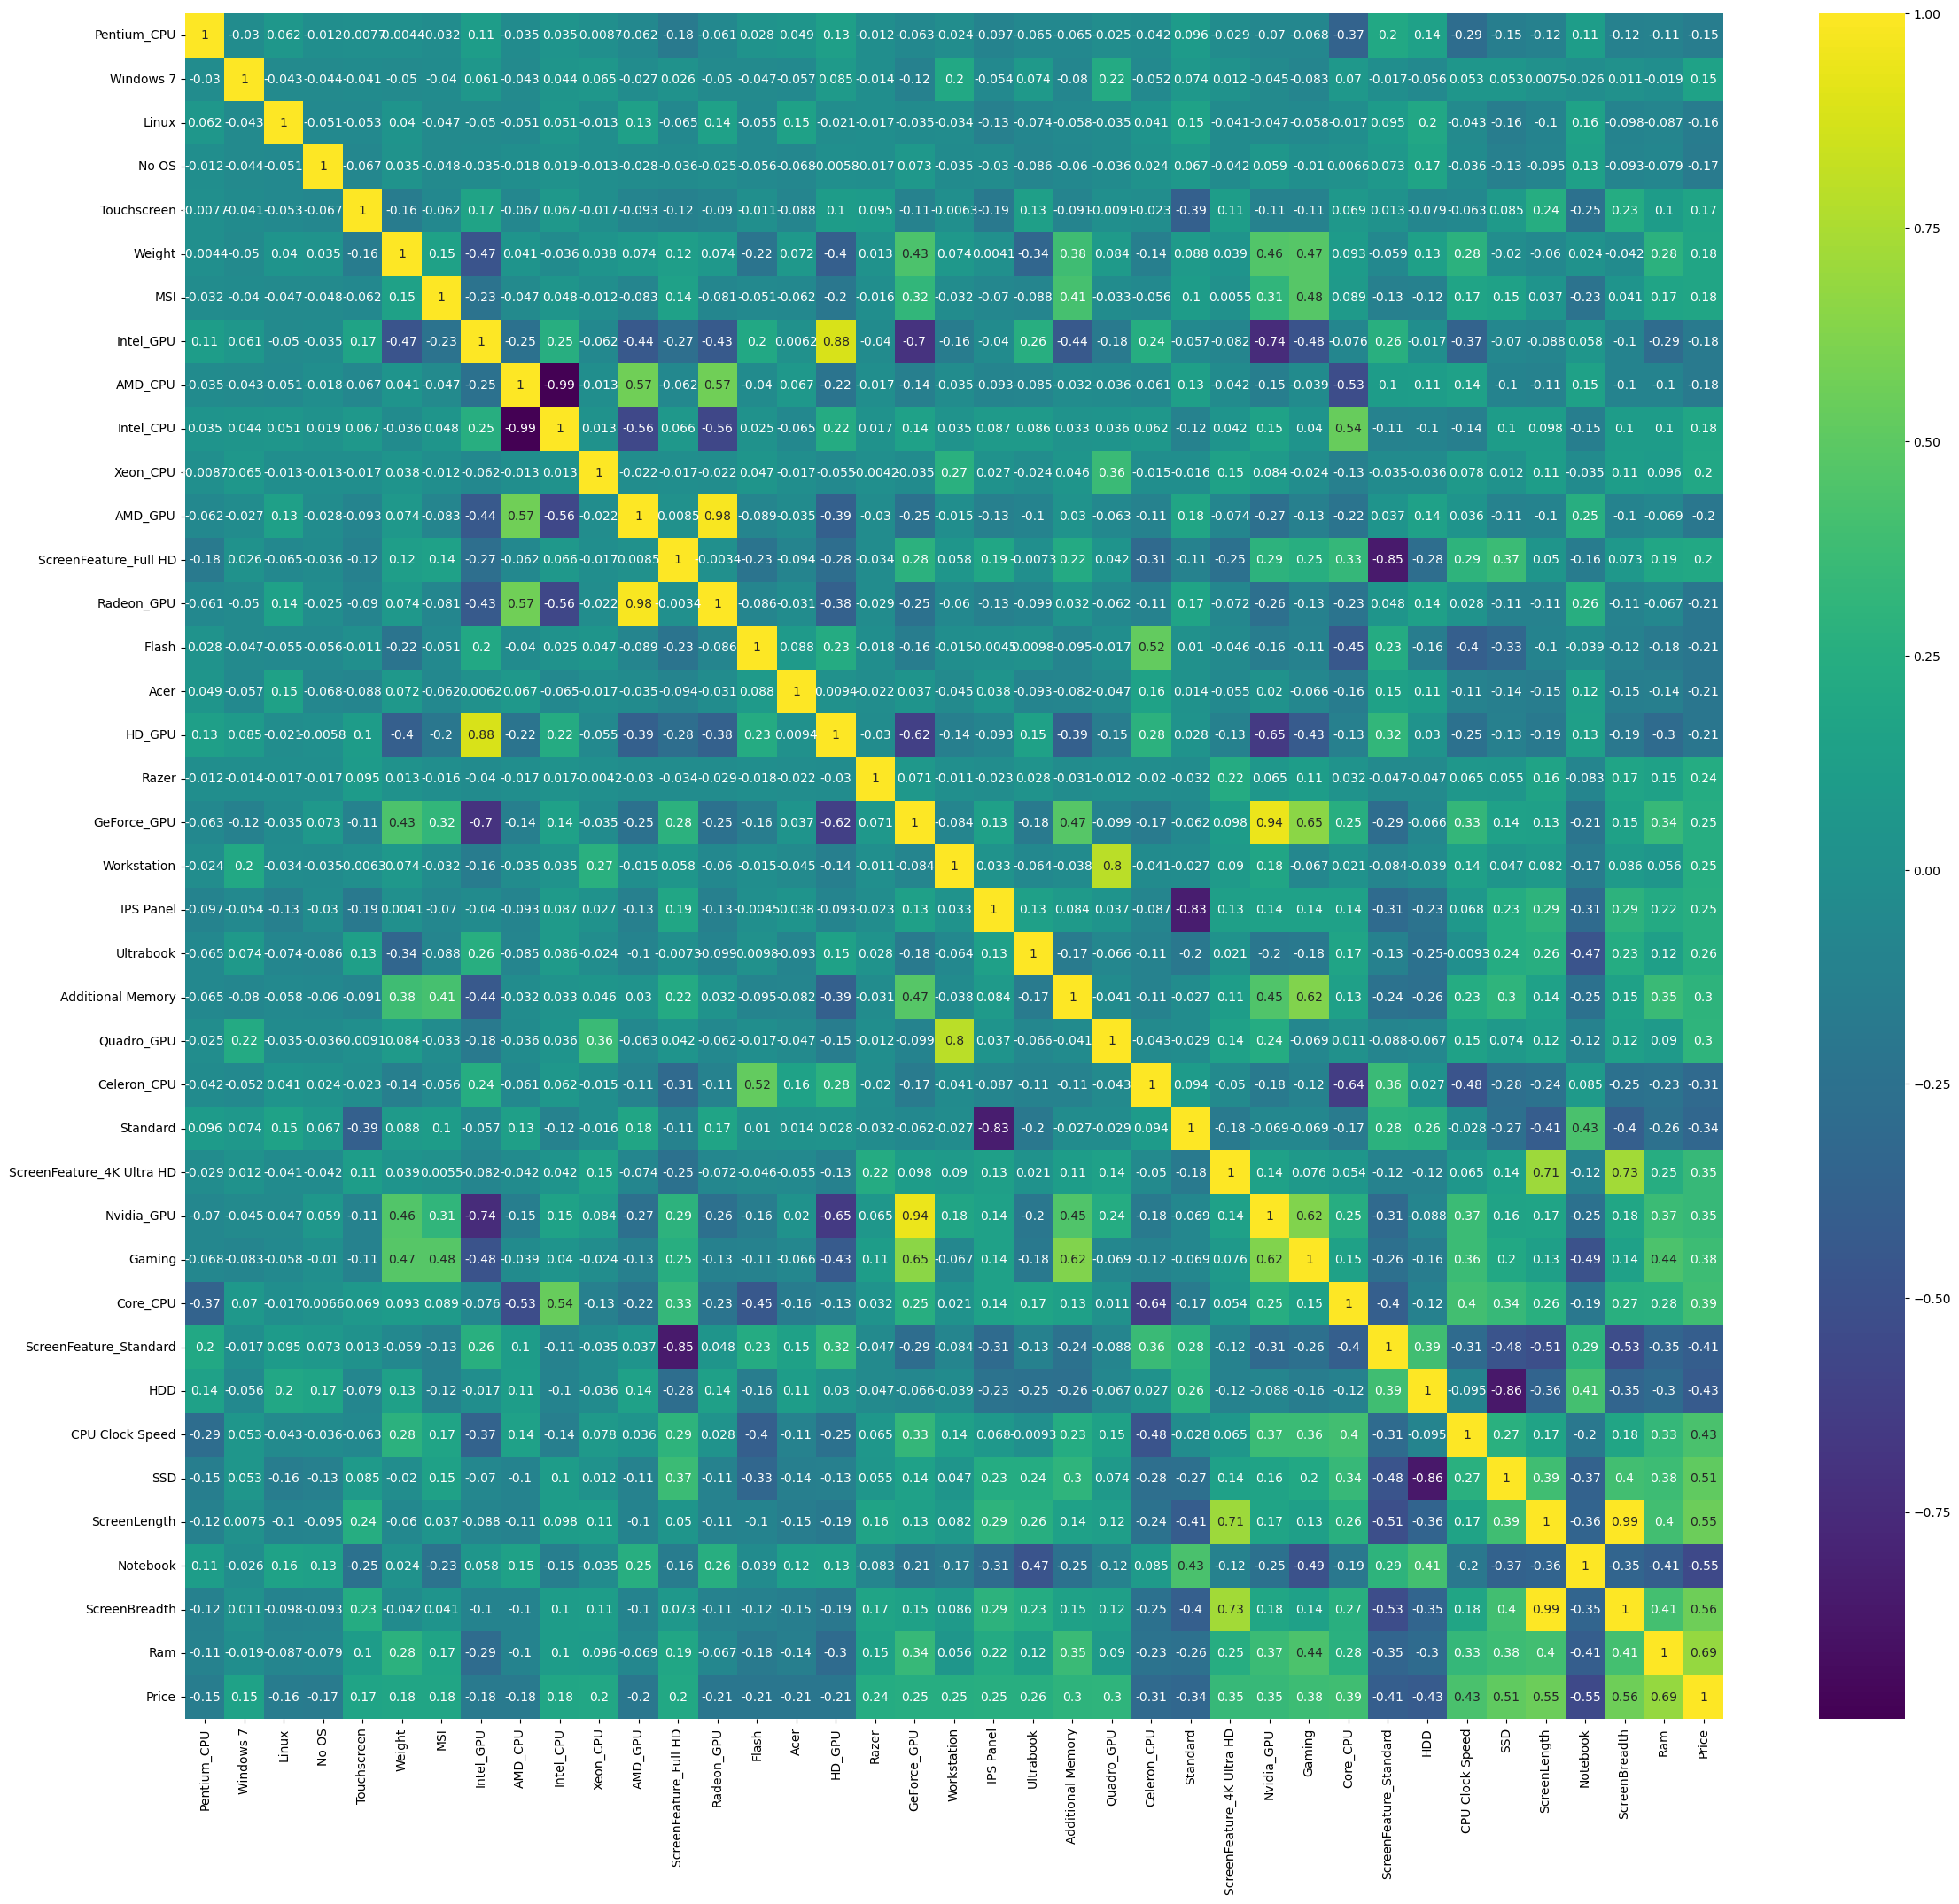

In [27]:
plt.figure(figsize = (28,25))
sns.heatmap(selected_df.corr(), annot=True, cmap = 'viridis')

Random Forest is well-suited for this project due to its ability to handle mixed feature types and evaluate feature importance effectively. Its ensemble approach ensures robust predictions and reduces the risk of overfitting in complex datasets.

In [47]:
from sklearn.ensemble import RandomForestRegressor

X, y = selected_df.drop("Price", axis = 1), selected_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42) # Use 20 percent of the data for training

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [48]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

Model Evaluation

In [49]:
forest.score(X_test_scaled, y_test)

0.7402261883308021

In [50]:
y_pred = forest.predict(X_test_scaled)

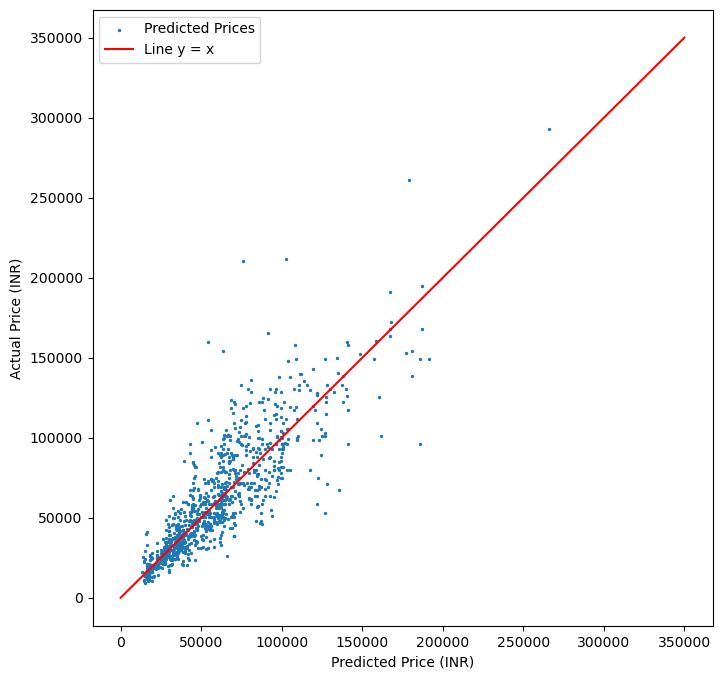

In [51]:
plt.figure(figsize=(8,8))

plt.scatter(y_pred, y_test, s = 2, label = "Predicted Prices")
plt.plot(range(0,350000), range(0,350000), color = 'red', label = "Line y = x")
plt.xlabel('Predicted Price (INR)')
plt.ylabel('Actual Price (INR)')
plt.legend()

In [52]:
i = 19 # Insert random integer less than the length of the X_test dataset.
X_new_scaled = scaler.transform([X_test.iloc[i]])

c:\Users\guill\anaconda3\envs\pytorchproject\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
print("The predicted price considering the given specifications is :", forest.predict(X_new_scaled))

The predicted price considering the given specifications is : [35703.05]


In [54]:
print("The actual price with the given specifications is :", y_test.iloc[i])

The actual price with the given specifications is : 42570
